# Time Series

### Python for time series

Main python librares: statsmodel/TSA, pandas, numpy, stldecompose
R has more functions than python for time series analysis with very good documentation
For Beginner/intermediate level  python is suffiecient

Time Series Analysis is a prerequisite of forecasting:<br>
1. We analyze data to find patterns<br>
2. Forecasting: Extrapolating the patterns into the future<br>

We look at some datasets with patterns

### Different Types of Datasets

Cross-sectional data <br>
Time series data <br>
Panel data <br>

Cross-sectional data or cross-section of a population is obtained by taking observations from multiple individuals at the same point in time. Cross-sectional data can comprise of observations taken at different points in time, however, in such cases time itself does not play any significant role in the analysis. SAT scores of high school students in a particular year is an example of cross-sectional data. Gross domestic product of countries in a given year is another example of cross-sectional data. Data for customer churn analysis is another example of cross-sectional data. Note that, in case of SAT scores of students and GDP of countries, all the observations have been taken in a single year and this makes the two datasets cross-sectional. In essence, the cross-sectional data represents a snapshot at a given instance of time in both the cases.

If we consider, for example United States, and take a look at its military expenses and central government debt for a span of 10 years from 2001 to 2010, that would get two time series - one about the US federal military expenditure and the other about debt of US federal government. Therefore, in essence, a time series is made up of quantitative observations on one or more measurable characteristics of an individual entity and taken at multiple points in time. In this case, the data represents yearly military expenditure and government debt for the United States. Time series data is typically characterized by several interesting internal structures such as trend, seasonality, stationarity, autocorrelation, and so on.

So far, we have seen data taken from multiple individuals but at one point in time (cross-sectional) or taken from an individual entity but over multiple points in time (time series). However, if we observe multiple entities over multiple points in time we get a panel data also known as longitudinal data. Extending our earlier example about the military expenditure, let us now consider four countries over the same period of 1960-2010. The resulting data will be a panel dataset.

### Internal structure of time series

Most time series has of can be expressed as xt = ft + st + ct + et, which is a sum of the trend, seasonal, cyclical, and irregular components in that order.

When a time series exhibits an upward or downward movement in the long run, it is said to have a general trend.



![Fig](imgs/img_001.png)

The general trend in the time series is due to fundamental shifts or systemic changes of the process or system it represents. For example, the upward movement of CO2 concentrations during 1974 through 1987 can be attributed to the gradual rise in automobiles and industrialization over these years.

A general trend is commonly modeled by setting up the time series as a regression against time and other known factors as explanatory variables. The regression or trend line can then be used as a prediction of the long run movement of the time series. Residuals left by the trend line is further analyzed for other interesting properties such as seasonality, cyclical behavior, and irregular variations.

In [1]:
from __future__ import print_function 
import os 
import pandas as pd 
import numpy as np 
%matplotlib inline 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_excel('../datasets/time_series/Monthly_CO2_Concentrations.xlsx',
                     converters={'Year': np.int32, 'Month':  np.int32}) 
data.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


In [5]:
# Before plotting we must remove all columns having missing values. Besides, 
# the DataFrame is sorted in ascending order of Year and Month. These are done as follows:
data = data.loc[(~pd.isnull(data['CO2']))& (~pd.isnull(data['Year']))& (~pd.isnull(data['Month']))] 
data.sort_values(['Year', 'Month'], inplace=True)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 10 Text xticklabel objects>)

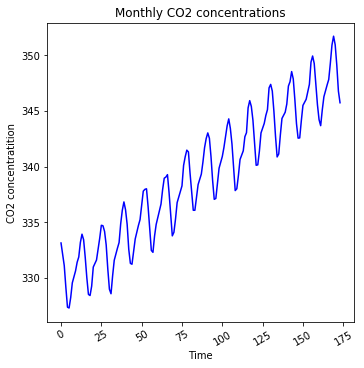

In [6]:

# Finally, the plot for the time period 1974 to 1987 is generated by executing the following lines:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

(array([ 70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 7 Text xticklabel objects>)

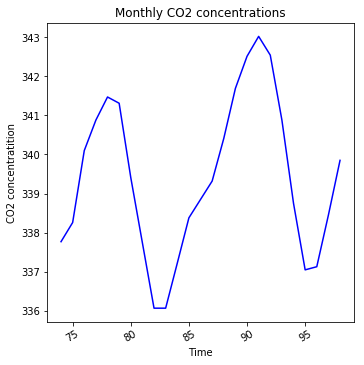

In [7]:
# The zoomed-in version of the data for the time period 1980 to 1981 is generated by 
# after the DataFrame for these three years:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

In [8]:
# Next, let us fit the trend line. For this we import the LinearRegression class from scikit-learn and 
# fit a linear model on the time index:
from sklearn.linear_model import LinearRegression 
trend_model = LinearRegression(normalize=True, fit_intercept=True) 
trend_model.fit(np.array(data.index).reshape((-1,1)), data['CO2']) 
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], 
                                                           trend_model.intercept_) 
      )

Trend model coefficient=0.11182207854546033 and intercept=329.4554222337025


(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 10 Text xticklabel objects>)

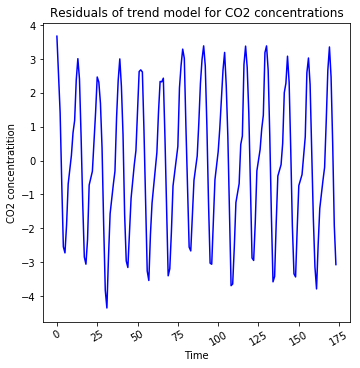

In [9]:
# The residuals obtained from the trend line model are shown in the following figure and appear to have seasonal behaviour, which is discussed in the next sub section.
# The residuals are calculated and plotted in the preceding by the following lines of code:
residuals = np.array(data['CO2']) - trend_model.predict(np.array(data.index).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

Thus, time series with clear patterns is the base of a successful forecast.

Another example: temperature measurements <br>
1. Midday is always warmer than midnight <br>
2. Winter is cooler than summer <br>

Three factors determing a successful forecast:<br>
1. Amount of data <br>
2. Clarity of patterns (Characteristics and regula intervals) <br>
3. Does the forecast affect the time series? <br>

Understand the background of data before you start modeling.

### Time frame of a forecast

The longer a forecast reaches into future the  more  inaccurate it gets.<br>
Forecast time frames can be short-term, medium term, long term <br>
The forecast time frame  depends on the unit of time dataset has eg. Minute, hour, month, week etc.<br>


Have several forecasting methods running in parallel until they return similar results (patterns identified)

### Steps to prepare for forecasting

Generating stationary data is important for enhancing the time series forecasting model. Deduction of the trend, seasonal, and cyclical components would leave us with irregular fluctuations which cannot be modeled by using only the time index as an explanatory variable. Therefore, in order to further improve forecasting, the irregular fluctuations are assumed to be independent and identically distributed (iid) observations and modeled by a linear regression on variables other than the time index.<br>
For example, house prices might exhibit both trend and seasonal (for example, quarterly) variations. However, the residuals left after adjusting trend and seasonality might actually depend on exogenous variables, such as total floor space, number of floors in the building and so on, which depend on specific instances in the sampled data. Therefore trend and seasonality adjustments along with a model on exogenous variables would be a better forecast for future instances of the time series.<br>
Changing the original time series to iid observations, or in other words stationarizing a time series, is an important step for developing the linear regression model on exogenous variables.<br>

![Fig](imgs/img_002.png)

In many cases, the original time series needs to be transformed into aggregate statistics. For example, observations in the original time series might have been recorded at every second; however, in order to perform any meaningful analysis, data must be aggregated every minute. This would need resampling the observations over periods that are longer than the granular time indices in the original data. The aggregate statistics, such as mean, median, and variance, is calculated for each of the longer periods of time.

### Resampling time series data

The technique of resmapling is illustrated using a time series on chemical concentration readings taken every two hours between 1st January 1975 and 17th January 1975.

In [11]:
import os 
import pandas as pd 
import numpy as np 
%matplotlib inline 
from matplotlib import pyplot as plt

In [12]:
# This is followed by reading the data from the CSV file in a pandas.DataFrame and displaying 
# shape and the first 10 rows of the DataFrame:
df = pd.read_csv('../datasets/time_series/chemical-concentration-readings.csv') 
print('Shape of the dataset:', df.shape) 
df.head(10)

Shape of the dataset: (197, 2)


,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1
5,1975-01-01 10:00:00,16.9
6,1975-01-01 12:00:00,16.8
7,1975-01-01 14:00:00,17.4
8,1975-01-01 16:00:00,17.1
9,1975-01-01 18:00:00,17.0


We will convert the bi-hourly observations of the original time series to
daily averages by applying the resample and mean functions on the second column. 
The resample function requires the row indices of the DataFrame to be timestamp of type
numpy.datetime64. Therefore, we change the row indices from whole numbers, as shown in the 
preceding table, to datetime_rowid which is a pandas.Series of numpy.datetime64 objects. 
The numpy.datetime64 objects are generated from the Timestamp column by using the pd.to datetime 
utility function. The following code shows how the row wise re-indexing is done:

In [13]:
datetime_rowid = df['Timestamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S')) 
df.index = datetime_rowid 
df.head(10)

,Timestamp,Chemical conc.
Timestamp,,
1975-01-01 00:00:00,1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,1975-01-01 08:00:00,17.1
1975-01-01 10:00:00,1975-01-01 10:00:00,16.9
1975-01-01 12:00:00,1975-01-01 12:00:00,16.8
1975-01-01 14:00:00,1975-01-01 14:00:00,17.4
1975-01-01 16:00:00,1975-01-01 16:00:00,17.1


In [14]:
daily = df['Chemical conc.'].resample('D') 
daily_mean = daily.mean()
# Notice that we have passed the argument D to the resample function to generate the daily averages. 
# For monthly and yearly aggregates, we need to pass M and Y to the resample function.

In [15]:
daily_mean

Timestamp
1975-01-01    16.866667
1975-01-02    17.258333
1975-01-03    17.458333
1975-01-04    17.416667
1975-01-05    17.033333
1975-01-06    17.150000
1975-01-07    16.833333
1975-01-08    16.516667
1975-01-09    16.783333
1975-01-10    16.750000
1975-01-11    17.133333
1975-01-12    16.750000
1975-01-13    17.050000
1975-01-14    17.125000
1975-01-15    17.266667
1975-01-16    17.408333
1975-01-17    17.540000
Freq: D, Name: Chemical conc., dtype: float64

### Select a forecasting method

Once we determine what is to be forecast and in which time frame, we have to determine a method of forecasting. <br>

If no data is available use qualitative method (also called judgemental forecast) performed by experts (eg. Delphi method) <br>

If historical data is available use quantitative methods performed by analysts <br>

The important features of a time series that influence method selection is whether the time series is regular (meaning specific interval between observations) or irregular (no fixed interval between observations) <br>
Forecast accuracy is much better with regular time series.<br>

Univariate (time series with 1 variable) or multivariate time series.The most common ones are univariate time series. <br>

### Time Series Fundamentals

1. Timestamp, order of timeseries, lags - general concept behind time series<br>
2. Importing and formatting time series data in python. Reading and understanding time series  plots <br>
   a. Characteristics: Seasonality, trend, variance, mean <br>
   b. Common combinations of statistical traits. <br>
3. Time series statistics: <br>
    a. Autocorrelation: ACF and PACF plots <br>
    b. Stationarity: Augmented Dickey-Fuller test <br>
4. Time series plots

In [17]:
lynx = pd.read_csv('../datasets/LYNXdata.csv')

In [18]:
lynx.head()

,year,trappings
0,1821,269
1,1822,321
2,1823,585
3,1824,871
4,1825,1475


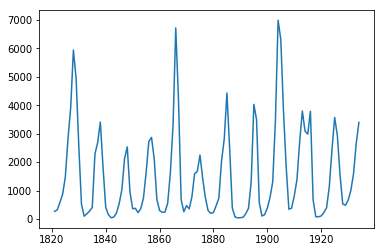

In [20]:
plt.plot(lynx.year, lynx.trappings)
plt.show()

In [25]:
lynx_df = pd.read_csv('../datasets/LYNXdata.csv', header=0, names=['year', 'trappings'],  index_col=0)

In [26]:
lynx_df.head()

,trappings
year,
1821,269
1822,321
1823,585
1824,871
1825,1475


### Time Series Vectors and traits
1. Time series vector has a specific order. eg. Temperature measurements taken every month<br>

In [27]:
lynx_simple = lynx_df['trappings']

In [28]:
lynx_simple.head()

year
1821     269
1822     321
1823     585
1824     871
1825    1475
Name: trappings, dtype: int64

In [29]:
lynxts = pd.Series(lynx_df['trappings'].values, index=pd.date_range('31/12/1821', periods=114, freq='A-DEC'))
# A is year end frequency, use last day of month december

![Fig](imgs/img_003.png)

In [30]:
lynxts.head()

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
Freq: A-DEC, dtype: int64

### Importing and generating time series with pandas
1. Import: pd.read_csv, # returns dataframe object <br>
2. pd.Series # Conversion to a series object <br>
3. Index generation: pd.date_range <br>

### Statistical Charecteristics of time series data
1. Trend <br>
2. Seasonality <br>
3. Mean <br>
4. Variance <br>

![Fig](imgs/img_004.png)

![Fig](imgs/img_005.png)

![Fig](imgs/img_006.png)

### Stationarity

Has the data the same statistical properties throughout the time series?<br>
1. Variance <br>
2. Mean <br>
3. AutoCorrelation <br>

Most models require stationarity. Following make the data stationary<br>
1. Transformations <br>
2. Differencing. <br>

### Trend = changing mean = underestimated predictions
### What to do if trend is present in time series?

![Fig](imgs/img_007.png)

### How to know if time series is stationary
1. Non-stationary dataset:<br>
    a. Changes in mean/variance <br>
    b. Presence of trend <br>
2. Unit Root test: <br>
    Augmented Dickey-Fuller test: removes autocorrelation and tests for stationarity.<br>
    p < 0.05 ==> Dataset is stattionary

In [38]:
from statsmodels.tsa.stattools import adfuller
def stationarity_test(ts):
    """"" Augmented Dickey-Fuller test"""""
    df_test = adfuller(ts, autolag="AIC")
    df_output = pd.Series(df_test[0:4], index=["Test Statistic", "p-value", "# lags used", "# observatios used"])
    print(df_output)

In [39]:
??stationarity_test

In [40]:
stationarity_test(lynxts)

Test Statistic         -2.996304
p-value                 0.035241
# lags used             7.000000
# observatios used    106.000000
dtype: float64


The following data will need some type of  transformation to be used for time series analysis

![Fig](imgs/img_008.png)

### AutoCorrelation

![Fig](imgs/img_009.png)

An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other. (The prefix auto means “self”— autocorrelation specifically refers to correlation among the elements of a time series.)

An autocorrelation plot shows the value of the autocorrelation function (acf) on the vertical axis. It can range from –1 to 1.

The horizontal axis of an autocorrelation plot shows the size of the lag between the elements of the time series. For example, the autocorrelation with lag 2 is the correlation between the time series elements and the corresponding elements that were observed two time periods earlier.

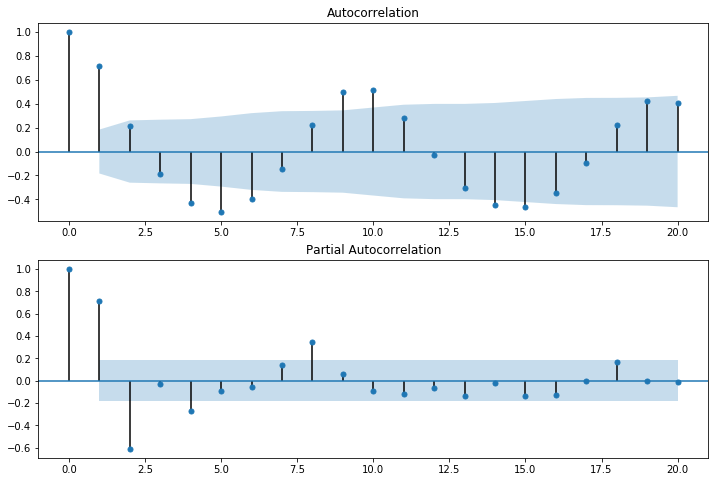

In [42]:
# Classic ACF and PACF Plots for Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation and partial autocorrelation in the Lynx dataset
# Two plots on one sheet
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(lynxts, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(lynxts, lags=20, ax=ax2)

In [43]:
lynxts.head()

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
Freq: A-DEC, dtype: int64

In [60]:
import numpy as np
np.log1p(321/269), np.log1p(585/321)-np.log1p(321/269)

(0.785411157297926, 0.2521870256150375)

### Blue area is boundary for 95% confidence level

### Visualizing time series

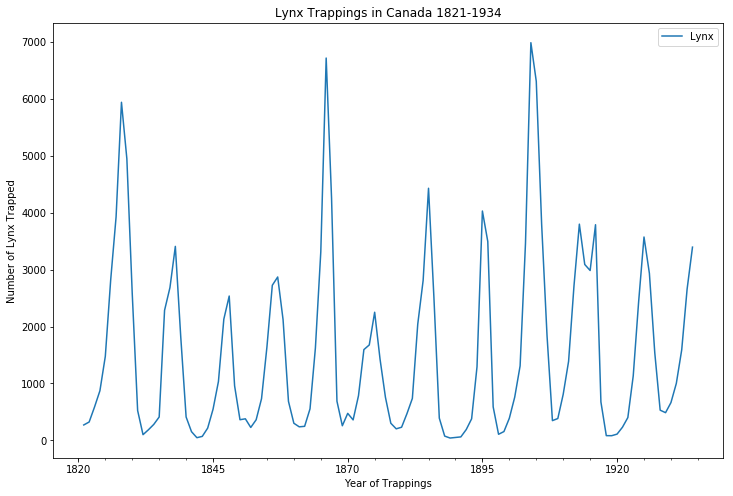

In [61]:
# Visualizing Time Series in Python
# Line graph with matplotlib pyplot module
plt.figure(figsize=(12,8))
lynxts.plot()
plt.title('Lynx Trappings in Canada 1821-1934')
plt.xlabel('Year of Trappings')
plt.ylabel('Number of Lynx Trapped')
plt.legend(['Lynx'])

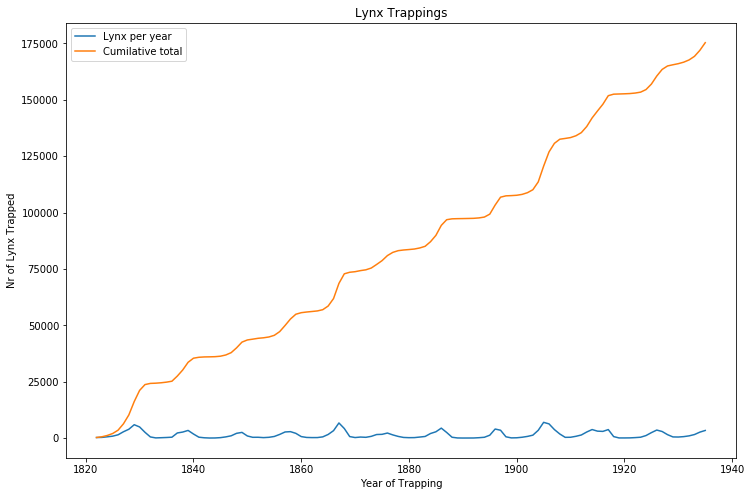

In [62]:
cumsum_lynx = np.cumsum(lynxts)
plt.figure(figsize=(12,8))
plt.plot(lynxts)
plt.plot(cumsum_lynx)
plt.title('Lynx Trappings')
plt.xlabel('Year of Trapping')
plt.ylabel('Nr of Lynx Trapped')
plt.legend(['Lynx per year', 'Cumilative total'])

Moving Averages and Smoothers

![Fig](imgs/img_010.png)

![Fig](imgs/img_011.png)

![Fig](imgs/img_012.png)

In [63]:
# Simple moving (rolling) calculations
# Note: the rolling methods are applicable only on pandas Series and DataFrame objects
def plot_rolling(timeseries, window):
    rol_mean = timeseries.rolling(window).mean()
    rol_std = timeseries.rolling(window).std()
    
    fig = plt.figure(figsize = (12, 8))
    og = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rol_mean, color = "red", label = "Rolling Mean")
    std = plt.plot(rol_std, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation (window = "+str(window)+")")
    plt.show()

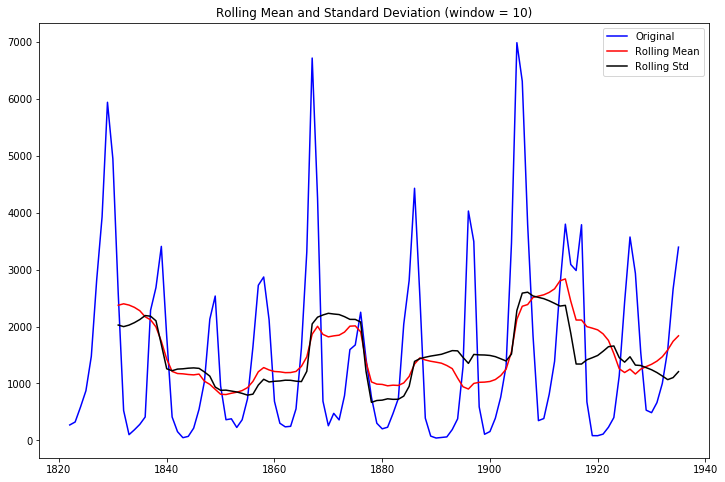

In [64]:
plot_rolling(lynxts,10)

In [65]:
# Exponentially Weighted Moving Average
# Note: the ewm method is applicable on pandas Series and DataFrame objects only
def plot_ewma(timeseries, alpha):
    expw_ma = timeseries.ewm(alpha=alpha).mean()

    fig = plt.figure(figsize = (12, 8))
    og_line = plt.plot(timeseries, color = "blue", label = "Original")
    exwm_line = plt.plot(expw_ma, color = "red", label = "EWMA")
    plt.legend(loc = "best")
    plt.title("EWMA (alpha= "+str(alpha)+")")
    plt.show()

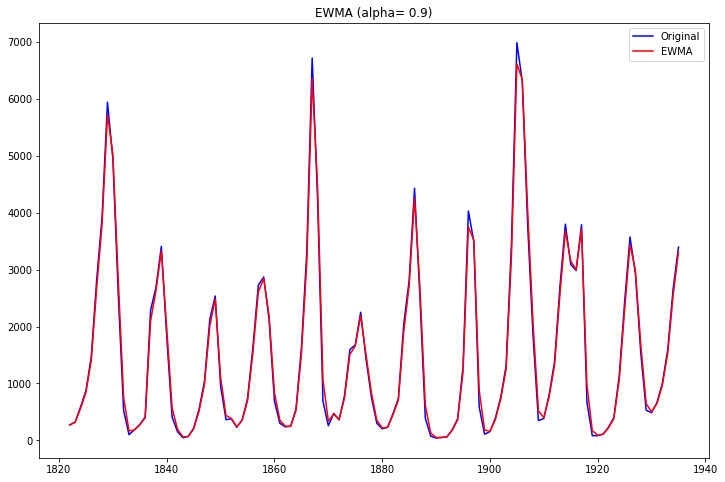

In [66]:
plot_ewma(lynxts, 0.9)

### ARIMA for univariate non-seasonal  data
ARIMA: Auto Regressive Integrated Moving Averages<br>
ARIMA is also the called the Box-Jenkins model <br>
![Fig](imgs/img_013.png)

![Fig](imgs/img_014.png)
![Fig](imgs/img_021.png)

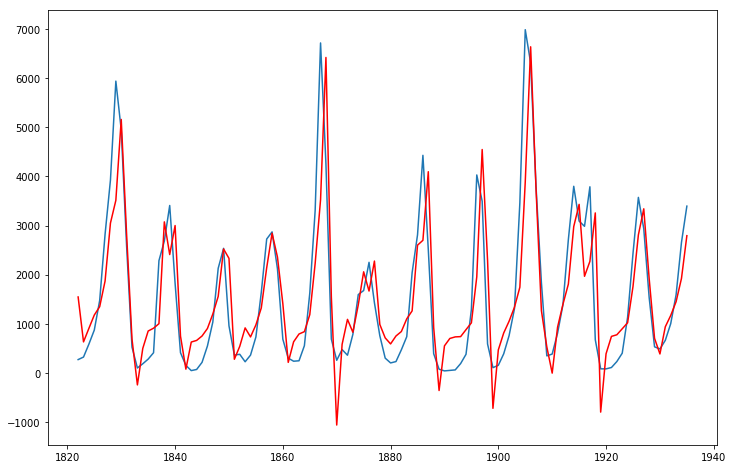

In [69]:
# ARIMA Model Setup
from statsmodels.tsa.arima_model import ARIMA
# Using ARIMA for the model, with the argument 'order'
# It is easy to change parameters
model = ARIMA(lynxts, order=(2, 0, 0))  
results_AR = model.fit()
plt.figure(figsize=(12,8))
plt.plot(lynxts)
plt.plot(results_AR.fittedvalues, color='red')

In [70]:
# Model Diagnostics
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:                     ARMA(2, 0)   Log Likelihood                -935.016
Method:                       css-mle   S.D. of innovations            876.447
Date:                Sun, 10 Feb 2019   AIC                           1878.032
Time:                        19:29:41   BIC                           1888.977
Sample:                    12-31-1821   HQIC                          1882.474
                         - 12-31-1934                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1545.0845    181.671      8.505      0.000    1189.016    1901.153
ar.L1.y        1.1474      0.074     15.459      0.000       1.002       1.293
ar.L2.y       -0.5998      0.074     -8.110      0.000      -0.745      -0.455
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9566           -0.8673j            1.2913           -0.1172
AR.2            0.9566           +0.8673j            1.2913            0.1172
-----------------------------------------------------------------------------
"""

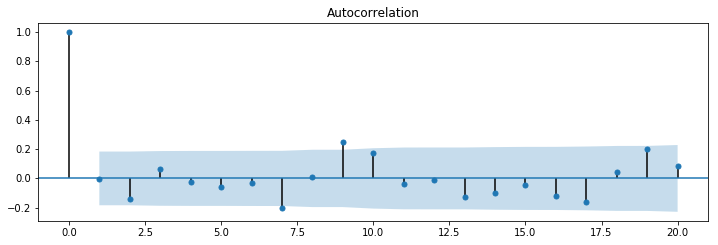

In [71]:
# ACF on Residuals of Our Model
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR.resid, lags=20, ax=ax1)

If the model lags are at the bginning of the model then the model needs improvement. But if they are at the end then it could be by chance.

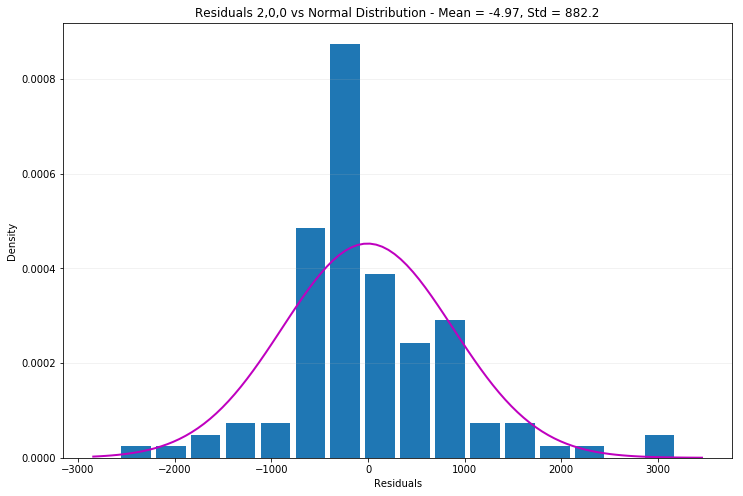

In [72]:
# Histogram of the Residuals
# Importing function for normal distribution
from scipy.stats import norm

plt.figure(figsize = (12, 8))
plt.hist(results_AR.resid, bins = 'auto', density = True, rwidth = 0.85,
         label = 'Residuals') #density TRUE - norm.dist bell curve
mu, std = norm.fit(results_AR.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) #linspace returns evenly spaced numbers over a specified interval
p = norm.pdf(x, mu, std) #pdf = probability density function
plt.plot(x, p, 'm', linewidth = 2)
plt.grid(axis='y', alpha = 0.2)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals 2,0,0 vs Normal Distribution - Mean = '+str(round(mu,2))+', Std = '+str(round(std,2)))
plt.show()

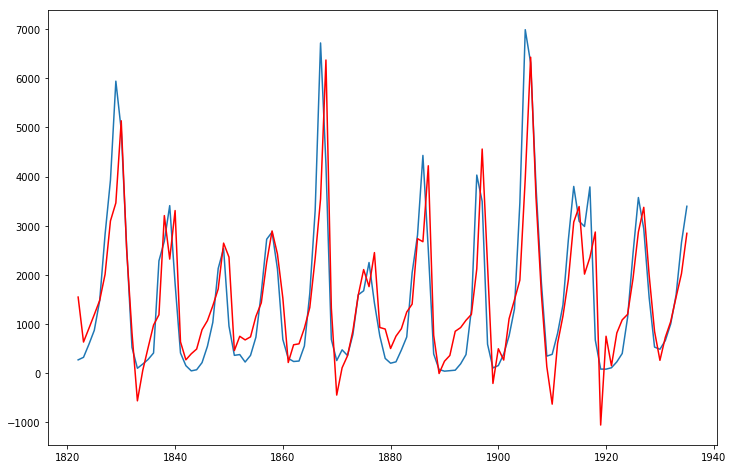

In [73]:
# ARIMA Model Setup
from statsmodels.tsa.arima_model import ARIMA
# Using ARIMA for the model, with the argument 'order'
# It is easy to change parameters
model = ARIMA(lynxts, order=(4, 0, 0))  
results_AR = model.fit()
plt.figure(figsize=(12,8))
plt.plot(lynxts)
plt.plot(results_AR.fittedvalues, color='red')

In [74]:
# Model Diagnostics
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:                     ARMA(4, 0)   Log Likelihood                -931.111
Method:                       css-mle   S.D. of innovations            845.949
Date:                Sun, 10 Feb 2019   AIC                           1874.222
Time:                        19:36:21   BIC                           1890.639
Sample:                    12-31-1821   HQIC                          1880.885
                         - 12-31-1934                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1547.3342    136.851     11.307      0.000    1279.112    1815.556
ar.L1.y        1.1246      0.090     12.450      0.000       0.948       1.302
ar.L2.y       -0.7174      0.137     -5.250      0.000      -0.985      -0.450
ar.L3.y        0.2634      0.136      1.935      0.056      -0.003       0.530
ar.L4.y       -0.2543      0.090     -2.837      0.005      -0.430      -0.079
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9198           -0.6880j            1.1486           -0.1022
AR.2            0.9198           +0.6880j            1.1486            0.1022
AR.3           -0.4020           -1.6789j            1.7264           -0.2874
AR.4           -0.4020           +1.6789j            1.7264            0.2874
-----------------------------------------------------------------------------
"""

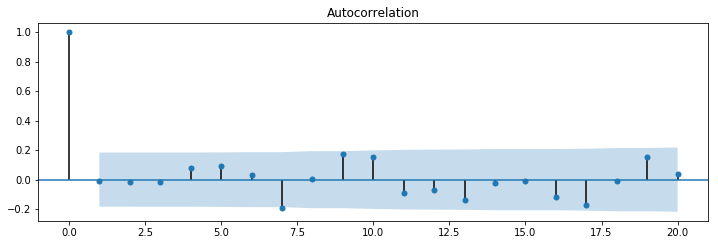

In [75]:
# ACF on Residuals of Our Model
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR.resid, lags=20, ax=ax1)

In [78]:
lynxts.tail()

1930-12-31     662
1931-12-31    1000
1932-12-31    1590
1933-12-31    2657
1934-12-31    3396
Freq: A-DEC, dtype: int64

In [77]:
results_AR.fittedvalues.tail()

1930-12-31     727.514166
1931-12-31    1048.199753
1932-12-31    1546.112827
1933-12-31    2024.965896
1934-12-31    2845.675606
Freq: A-DEC, dtype: float64

In [79]:
results_AR.resid.tail()

1930-12-31    -65.514166
1931-12-31    -48.199753
1932-12-31     43.887173
1933-12-31    632.034104
1934-12-31    550.324394
Freq: A-DEC, dtype: float64

In [81]:
# Forecast based on the ARIMA(4,0,0) model
Fcast400 = results_AR.predict(start = '31/12/1935',
                               end = '31/12/1945')

In [83]:
# For the comparison, let's set up another model
# Arima(2,0,2) model and its fitted values
model202 = ARIMA(lynxts, order=(2, 0, 2))  
results_M202 = model202.fit()

In [84]:
# Forecast based on the ARIMA(2,0,2) model
Fcast202 = results_M202.predict(start = '31/12/1935',
                                end = '31/12/1945')

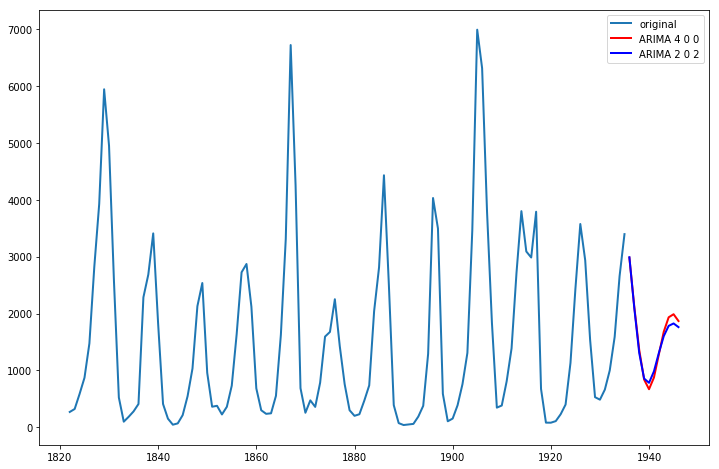

In [85]:
# Comparing the forecasts via data visualization
plt.figure(figsize = (12, 8))
plt.plot(lynxts, linewidth = 2, label = "original")
plt.plot(Fcast400, color='red', linewidth = 2,
         label = "ARIMA 4 0 0")
plt.plot(Fcast202, color='blue', linewidth = 2,
         label = "ARIMA 2 0 2")
plt.legend()

## Models for seasonal data

Temperature at Nottingham Castle in UK

![Fig](imgs/img_015.png)

In [87]:
# Importing the 'nottem' dataset as a pandas DataFrame
# Make sure that nottem.csv is in the same folder as this python notebook
nottem = pd.read_csv("../datasets/nottem.csv", header = 0, parse_dates = [0], names = ['Month', 'Temp'], index_col = 0)
print(nottem.shape)
nottem.head()

(240, 1)


,Temp
Month,
1,40.6
2,40.8
3,44.4
4,46.7
5,54.1


In [88]:
# Conversion to a pandas Series object
nottemts = pd.Series((nottem.Temp).values,
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))

In [89]:
nottemts.head()

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
Freq: M, dtype: float64

### Seasonal decomposition

![Fig](imgs/img_016.png)

In [90]:
# Seasonal Decomposition
# Simple seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(nottemts)

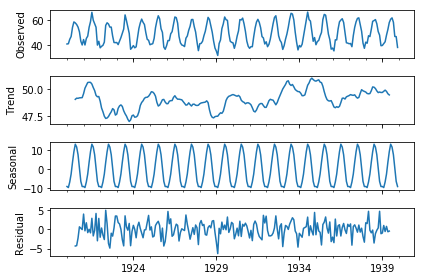

In [106]:
visual = decomposed.plot()

# The plot decomposes the original observation into 4 plots - trend, seasonal, residual (noise). We see that there
# is no real trend, the seasonal amplitude is the same for whole time series.

In [96]:
# Decomposition based on stl - Package: stldecompose
# Install the library via PIP
# Import the decompose function
# !pip install stldecompose
from stldecompose import decompose

In [97]:
# STL decomposition of nottem
stl = decompose(nottemts, period=12)
stl.trend.head()

1920-01-31    48.616042
1920-02-29    48.612980
1920-03-31    48.609917
1920-04-30    48.606960
1920-05-31    48.604002
Freq: M, dtype: float64

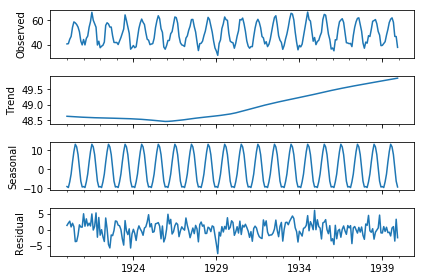

In [99]:
stlvisual = stl.plot()

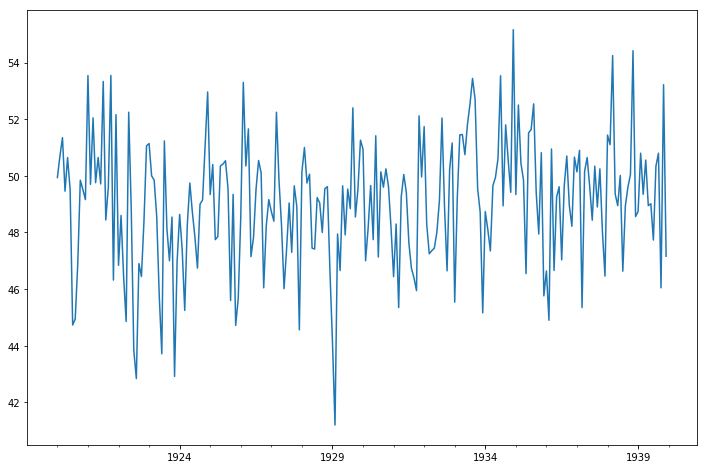

In [100]:
# Seasonal Adjustment and Forecasting
nottemadjusted = nottemts - decomposed.seasonal
plt.figure(figsize=(12,8))
nottemadjusted.plot()

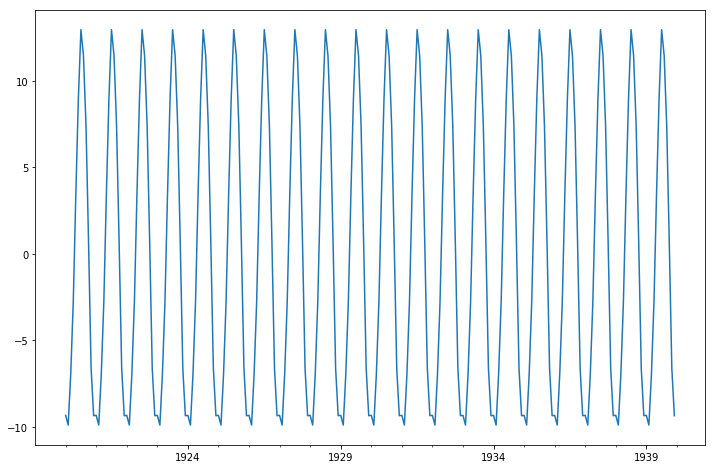

In [101]:
# Getting the seasonal component only
plt.figure(figsize=(12,8))
decomposed.seasonal.plot()

In [102]:
# Creating a forecast based on STL
from stldecompose import forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)

![Fig](imgs/img_017.png)

In [103]:
fcast = forecast(stl, steps=12, fc_func=seasonal_naive, seasonal = True)

fcast.head()

,seasonal_naive+seasonal
1940-01-31 10:29:06,40.508501
1940-02-29 10:29:06,40.006367
1940-03-31 10:29:06,43.014288
1940-04-30 10:29:06,47.111975
1940-05-31 10:29:06,53.384711


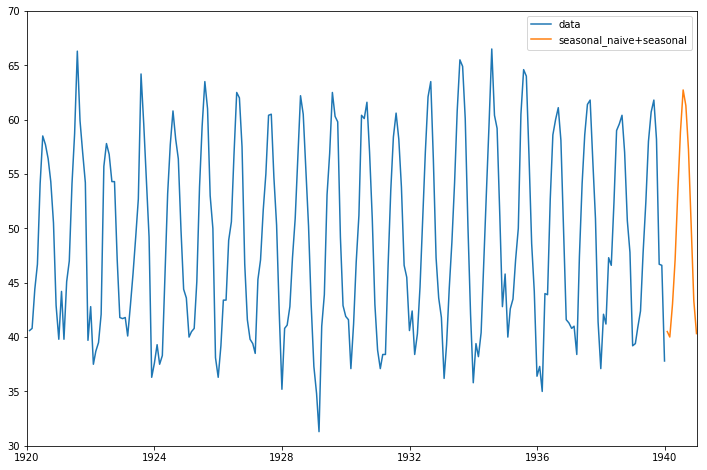

In [104]:
# Plot of the forecast and the original data
plt.figure(figsize=(12,8))
plt.plot(nottemts, label='data')
plt.plot(fcast, label=fcast.columns[0])
plt.xlim('1920','1941'); plt.ylim(30,70);
plt.legend()

![Fig](imgs/img_018.png)

### Quantitative Forecasting:  Exponential smoothing

![Fig](imgs/img_019.png)

![Fig](imgs/img_020.png)

In [107]:
# Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
help(ExponentialSmoothing)

Help on class ExponentialSmoothing in module statsmodels.tsa.holtwinters:

class ExponentialSmoothing(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  Holt Winter's Exponential Smoothing
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      Time series
 |  trend : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of trend component.
 |  damped : bool, optional
 |      Should the trend component be damped.
 |  seasonal : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of seasonal component.
 |  seasonal_periods : int, optional
 |      The number of seasons to consider for the holt winters.
 |  
 |  Returns
 |  -------
 |  results : ExponentialSmoothing class        
 |  
 |  Notes
 |  -----
 |  This is a full implementation of the holt winters exponential smoothing as
 |  per [1]. This includes all the unstable methods as well as the stable methods.
 |  The implementation of the library covers the functionality of the R 
 

In [108]:
# Setting up the exponential smoothing model (A,N,A)
expsmodel = ExponentialSmoothing(nottemts, seasonal = "additive",
                                 seasonal_periods = 12)

In [109]:
# Fit model
expsmodelfit = expsmodel.fit()

![Fig](imgs/img_022.png)

In [110]:
# Alpha smoothing coefficient
expsmodelfit.params['smoothing_level']

0.031012756748236454

In [111]:
# Gamma smoothing coefficient
expsmodelfit.params['smoothing_seasonal']

0.0

In [112]:
# Prediction with exponential smoothing
expsfcast = expsmodelfit.predict(start = 240, end = 251)

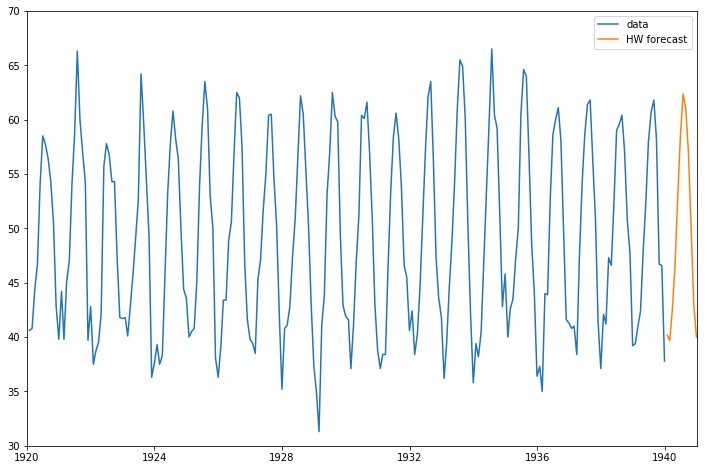

In [113]:
# Plotting the predictied values and the original data
plt.figure(figsize=(12,8))
plt.plot(nottemts, label='data')
plt.plot(expsfcast, label='HW forecast')
plt.xlim('1920','1941'); plt.ylim(30,70);
plt.legend()

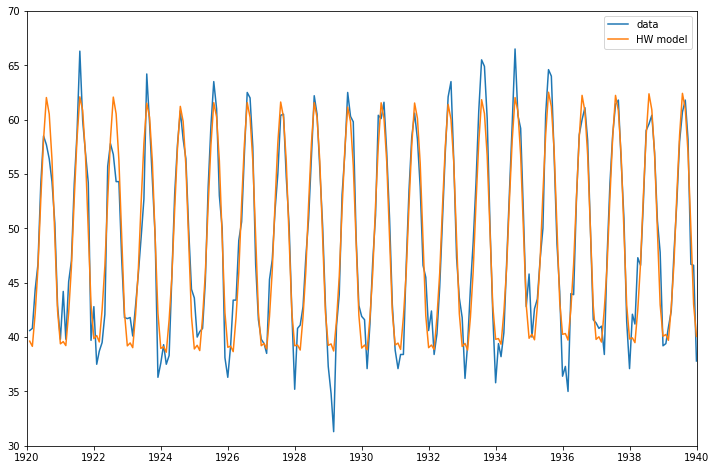

In [114]:
# Comparing the model to the original values
# How good is the model fit?
plt.figure(figsize=(12,8))
plt.plot(nottemts, label='data')
plt.plot(expsmodelfit.fittedvalues, label='HW model')
plt.xlim('1920','1940'); plt.ylim(30,70);
plt.legend()

## Introduction to Fbprophet by Facebook

![Fig](imgs/img_023.png)

In [116]:
nottem_df = pd.DataFrame({'ds': nottemts.index, 'y': nottemts.values})

In [118]:
nottem_df.shape

(240, 2)

In [120]:
nottem_df.head(2)

,ds,y
0,1920-01-31,40.6
1,1920-02-29,40.8


In [121]:
from fbprophet import Prophet
mymodel = Prophet()
mymodel.fit(nottem_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [122]:
future_data = mymodel.make_future_dataframe(periods=12, freq='M')
fcast = mymodel.predict(future_data)

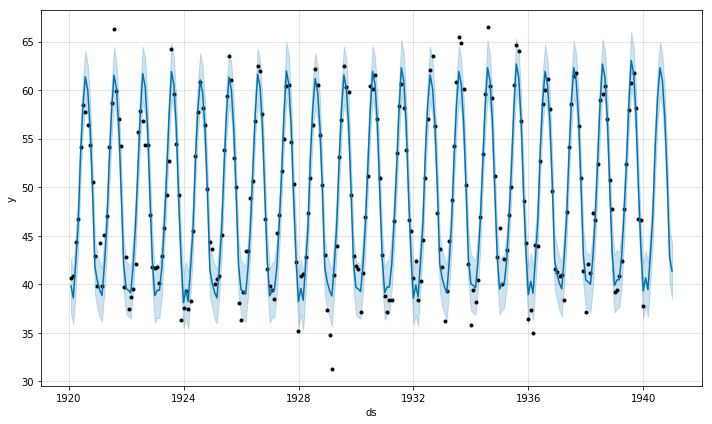

In [124]:
vis = mymodel.plot(fcast)

The black dots are the actual seasonal data in the dataset.